In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

In [4]:
df = pd.read_csv("data.csv")  #Import the data file 

In [5]:
df.head()

,time,Cyclone_Inlet_Gas_Temp,Cyclone_Material_Temp,Cyclone_Outlet_Gas_draft,Cyclone_cone_draft,Cyclone_Gas_Outlet_Temp,Cyclone_Inlet_Draft
0,1/1/2017 0:00,867.63,910.42,-189.54,-186.04,852.13,-145.9
1,1/1/2017 0:05,879.23,918.14,-184.33,-182.1,862.53,-149.76
2,1/1/2017 0:10,875.67,924.18,-181.26,-166.47,866.06,-145.01
3,1/1/2017 0:15,875.28,923.15,-179.15,-174.83,865.85,-142.82
4,1/1/2017 0:20,891.66,934.26,-178.32,-173.72,876.06,-143.39


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378719 entries, 0 to 378718
Data columns (total 7 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   time                      377719 non-null  object
 1   Cyclone_Inlet_Gas_Temp    377719 non-null  object
 2   Cyclone_Material_Temp     377719 non-null  object
 3   Cyclone_Outlet_Gas_draft  377719 non-null  object
 4   Cyclone_cone_draft        377719 non-null  object
 5   Cyclone_Gas_Outlet_Temp   377719 non-null  object
 6   Cyclone_Inlet_Draft       377719 non-null  object
dtypes: object(7)
memory usage: 20.2+ MB


In [6]:
df.isna().sum()

time                        1000
Cyclone_Inlet_Gas_Temp      1000
Cyclone_Material_Temp       1000
Cyclone_Outlet_Gas_draft    1000
Cyclone_cone_draft          1000
Cyclone_Gas_Outlet_Temp     1000
Cyclone_Inlet_Draft         1000
dtype: int64

In [7]:
# First Convert timestamp column to datetime
df['time'] = pd.to_datetime(df['time'], errors = 'coerce')

In [8]:
df.head()

,time,Cyclone_Inlet_Gas_Temp,Cyclone_Material_Temp,Cyclone_Outlet_Gas_draft,Cyclone_cone_draft,Cyclone_Gas_Outlet_Temp,Cyclone_Inlet_Draft
0,2017-01-01 00:00:00,867.63,910.42,-189.54,-186.04,852.13,-145.9
1,2017-01-01 00:05:00,879.23,918.14,-184.33,-182.1,862.53,-149.76
2,2017-01-01 00:10:00,875.67,924.18,-181.26,-166.47,866.06,-145.01
3,2017-01-01 00:15:00,875.28,923.15,-179.15,-174.83,865.85,-142.82
4,2017-01-01 00:20:00,891.66,934.26,-178.32,-173.72,876.06,-143.39


In [9]:
# Now we have to Convert all sensor readings to numeric values
df.iloc[:,1:] = df.iloc[:,1:].apply(pd.to_numeric, errors='coerce')

In [10]:
# Now we can Drop rows with missing or invalid entries
df.dropna(inplace=True)

In [11]:
df.isna().sum()

time                        0
Cyclone_Inlet_Gas_Temp      0
Cyclone_Material_Temp       0
Cyclone_Outlet_Gas_draft    0
Cyclone_cone_draft          0
Cyclone_Gas_Outlet_Temp     0
Cyclone_Inlet_Draft         0
dtype: int64

In [12]:
# Now we have to start the Evaluation process 
features = df.drop(columns=['time'])

In [13]:
# Initialize and train the Isolation Forest model
model = IsolationForest(n_estimators=100, contamination=0.01, random_state=42)
df['anomaly'] = model.fit_predict(features)

In [14]:
df.head()

,time,Cyclone_Inlet_Gas_Temp,Cyclone_Material_Temp,Cyclone_Outlet_Gas_draft,Cyclone_cone_draft,Cyclone_Gas_Outlet_Temp,Cyclone_Inlet_Draft,anomaly
0,2017-01-01 00:00:00,867.63,910.42,-189.54,-186.04,852.13,-145.9,1
1,2017-01-01 00:05:00,879.23,918.14,-184.33,-182.1,862.53,-149.76,1
2,2017-01-01 00:10:00,875.67,924.18,-181.26,-166.47,866.06,-145.01,1
3,2017-01-01 00:15:00,875.28,923.15,-179.15,-174.83,865.85,-142.82,1
4,2017-01-01 00:20:00,891.66,934.26,-178.32,-173.72,876.06,-143.39,1


In [15]:
print(df[df['anomaly'] == -1].head())

                    time Cyclone_Inlet_Gas_Temp Cyclone_Material_Temp  \
6363 2017-01-23 02:15:00                 769.63                691.05   
6373 2017-01-23 03:05:00                 592.82                463.82   
6399 2017-01-23 05:15:00                 495.33                375.95   
6408 2017-01-23 06:00:00                 626.54                884.37   
6409 2017-01-23 06:05:00                 643.77                941.96   

     Cyclone_Outlet_Gas_draft Cyclone_cone_draft Cyclone_Gas_Outlet_Temp  \
6363                    20.54               4.48                  745.29   
6373                     -8.8             -24.96                  579.13   
6399                   -22.78             -39.44                  459.85   
6408                    14.61              -4.99                  609.39   
6409                     7.69             -11.36                  621.84   

     Cyclone_Inlet_Draft  anomaly  
6363               15.19       -1  
6373               -6.91       -

In [16]:
# Count the number of 1's and -1's from the anomalies Column
cnt1 = (df['anomaly'] == 1).sum()
cnt2 = (df['anomaly'] == -1).sum()

In [17]:
print("Total Number of 1's :", cnt1)
print("Total Number of -1's :", cnt2)

Total Number of 1's : 372362
Total Number of -1's : 3762


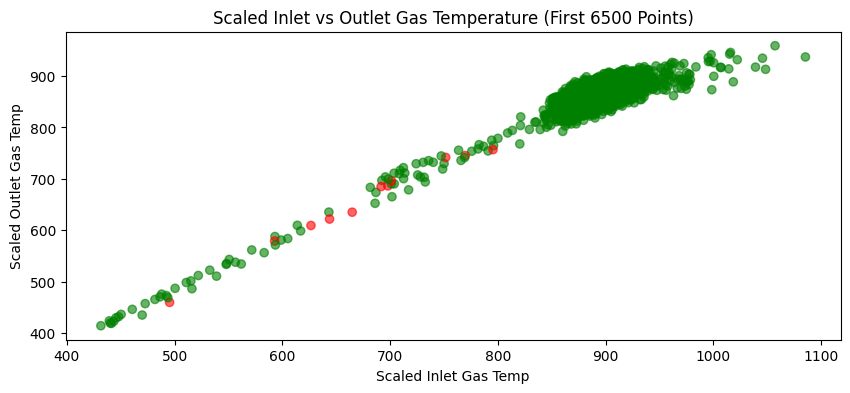

In [33]:
# Let's Visuailise the data points using Plot for first 6500 data points
# for that lets create a subset

subset = df.iloc[:6500]

x = subset['Cyclone_Inlet_Gas_Temp']
y = subset['Cyclone_Gas_Outlet_Temp']

color = subset['anomaly'].map({1:'green', -1:'red'})

# figure size
plt.figure(figsize=(10,4))
plt.scatter(x, y, c=color, alpha=0.6)

# Labels and title
plt.xlabel("Scaled Inlet Gas Temp")
plt.ylabel("Scaled Outlet Gas Temp")
plt.title("Scaled Inlet vs Outlet Gas Temperature (First 6500 Points)")
plt.show()

In [22]:
# Save results to CSV
df.to_csv("cyclone_anomaly_results.csv", index=False)